# LAB 2 Naive Bayes
Nov. 7th, 2024
by Tavares h. and Cole M.

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

carData = pd.read_csv('carDataNL_train.csv')
CarDataTest = pd.read_csv('carDataNL_test.csv')
print(carData.shape)  # gives a tuple with the shape of data frame

(25, 5)


In [2]:
print(carData.head())
print(CarDataTest.head())

    price     maintenance  trunk safety RATING
0  luxury       high_cost  small   poor    LOW
1  medium        med_cost  small    ave    LOW
2  luxury        low_cost    big   good   HIGH
3    high  very_high_cost  small   poor    LOW
4  medium        med_cost  small   poor    LOW
    price maintenance  trunk safety RATING
0  medium    low_cost    big   poor    LOW
1    high    low_cost    big   good   HIGH
2    high   high_cost    big   good   HIGH
3     low   high_cost  small    ave    LOW
4  medium    med_cost    med    ave   HIGH


In [3]:
splitRatio = 1

In [4]:
price_labels = ['low', 'medium', 'high', 'luxury']
maint_labels = ['low_cost', 'med_cost', 'high_cost', 'very_high_cost']
trunk_labels = ['small', 'med', 'big']
safety_labels = ['poor', 'ave', 'good']

In [5]:
# Do the shuffle!
reCarData = carData.reindex(np.random.permutation(carData.index))
shuffCarData = reCarData.reset_index()

In [6]:
shuffCarData

,index,price,maintenance,trunk,safety,RATING
0,3,high,very_high_cost,small,poor,LOW
1,18,medium,med_cost,med,good,LOW
2,1,medium,med_cost,small,ave,LOW
3,16,high,med_cost,med,ave,HIGH
4,5,high,med_cost,big,good,HIGH
5,17,low,high_cost,big,good,HIGH
6,10,medium,med_cost,med,good,HIGH
7,19,low,low_cost,med,ave,HIGH
8,11,luxury,high_cost,small,ave,LOW
9,9,low,low_cost,big,poor,HIGH


In [7]:
shuffCarData.pop('index')

0      3
1     18
2      1
3     16
4      5
5     17
6     10
7     19
8     11
9      9
10     0
11    13
12    22
13    21
14     4
15     8
16     7
17    14
18    15
19    12
20    23
21     2
22    20
23    24
24     6
Name: index, dtype: int64

In [8]:
shuffCarData
CarDataTest

,price,maintenance,trunk,safety,RATING
0,medium,low_cost,big,poor,LOW
1,high,low_cost,big,good,HIGH
2,high,high_cost,big,good,HIGH
3,low,high_cost,small,ave,LOW
4,medium,med_cost,med,ave,HIGH


In [9]:
# function definition: getting the counts (frequencies of occurrence)
def count(data,colname,label,target):    # for whichever data set, pick a column and one value in that column
                                         # and an output label (target) to compare against
    condition = (data[colname] == label) & (data['RATING'] == target)
    print(data[condition])
    return len(data[condition])

In [10]:
# list of predicted values
predicted = []

# dictionary to store probabilities
probabilities = {0:{},1:{}}

#length of current training set
train_len = int(splitRatio * len(shuffCarData))
test_len = len(CarDataTest)
print(train_len)
print(test_len)

#splitting the data into training and test sets
training = shuffCarData.iloc[:train_len,:] # the first train_len rows, all columns

25
5


In [11]:
# debugging step: looking at the training set
training

,price,maintenance,trunk,safety,RATING
0,high,very_high_cost,small,poor,LOW
1,medium,med_cost,med,good,LOW
2,medium,med_cost,small,ave,LOW
3,high,med_cost,med,ave,HIGH
4,high,med_cost,big,good,HIGH
5,low,high_cost,big,good,HIGH
6,medium,med_cost,med,good,HIGH
7,low,low_cost,med,ave,HIGH
8,luxury,high_cost,small,ave,LOW
9,low,low_cost,big,poor,HIGH


In [12]:
CarDataTest = pd.read_csv('carDataNL_test.csv')
test_X = CarDataTest.iloc[:,:-1] # features in the test set
test_y = CarDataTest.iloc[:,-1]  # targets (the last entry in each row; i.e., the last column)

In [13]:
# debugging
print(test_X)

    price maintenance  trunk safety
0  medium    low_cost    big   poor
1    high    low_cost    big   good
2    high   high_cost    big   good
3     low   high_cost  small    ave
4  medium    med_cost    med    ave


In [14]:
# debugging
print(test_y)

0     LOW
1    HIGH
2    HIGH
3     LOW
4    HIGH
Name: RATING, dtype: object


In [15]:
# checking for dimension match
CarDataTest
print(test_X.shape)
print(test_y.shape)
print(test_X)
print(len(test_y))

(5, 4)
(5,)
    price maintenance  trunk safety
0  medium    low_cost    big   poor
1    high    low_cost    big   good
2    high   high_cost    big   good
3     low   high_cost  small    ave
4  medium    med_cost    med    ave
5


In [16]:
# counts of prior 'LOW' and 'HIGH' labels (targets)
count_LOW = count(training, 'RATING', 'LOW', 'LOW')
count_HIGH = count(training, 'RATING', 'HIGH', 'HIGH')

prior_LOW = count_LOW / len(training)
prior_HIGH = count_HIGH / len(training)

print('The prior \'LOW\' count is', count_LOW)
print('and \'HIGH\',',count_HIGH, '.')
print('The prior probability of \'LOW\' is', prior_LOW)
print('and of \'HIGH\',', prior_HIGH, '.')

     price     maintenance  trunk safety RATING
0     high  very_high_cost  small   poor    LOW
1   medium        med_cost    med   good    LOW
2   medium        med_cost  small    ave    LOW
8   luxury       high_cost  small    ave    LOW
10  luxury       high_cost  small   poor    LOW
12    high  very_high_cost    med   poor    LOW
13  luxury       high_cost    big    ave    LOW
14  medium        med_cost  small   poor    LOW
16    high       high_cost    big   good    LOW
18  medium        med_cost    med    ave    LOW
20  luxury        med_cost  small    ave    LOW
22  medium  very_high_cost  small   poor    LOW
     price maintenance trunk safety RATING
3     high    med_cost   med    ave   HIGH
4     high    med_cost   big   good   HIGH
5      low   high_cost   big   good   HIGH
6   medium    med_cost   med   good   HIGH
7      low    low_cost   med    ave   HIGH
9      low    low_cost   big   poor   HIGH
11     low    low_cost   big   good   HIGH
15    high   high_cost   med    

In [17]:
# TRAINING: learning the priors and class-conditionals from the training set
for col in training.columns[:-1]:
    probabilities[0][col] = {}
    probabilities[1][col] = {}

    if col == "price":
        for k in price_labels:
            count_k_LOW = count(training, col, k, 'LOW')
            count_k_HIGH = count(training, col, k, 'HIGH')
            probabilities[0][col][k] = count_k_LOW / count_LOW
            probabilities[1][col][k] = count_k_HIGH / count_HIGH
            probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
            probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product    
    else:
        if col == "maintenance":
            for k in maint_labels:
                count_k_LOW = count(training, col, k, 'LOW')
                count_k_HIGH = count(training, col, k, 'HIGH')
                probabilities[0][col][k] = count_k_LOW / count_LOW
                probabilities[1][col][k] = count_k_HIGH / count_HIGH
                probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
        else:
            if col == "trunk":
                for k in trunk_labels:
                    count_k_LOW = count(training, col, k, 'LOW')
                    count_k_HIGH = count(training, col, k, 'HIGH')
                    probabilities[0][col][k] = count_k_LOW / count_LOW
                    probabilities[1][col][k] = count_k_HIGH / count_HIGH
                    probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                    probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
            else:
                for k in safety_labels:
                    count_k_LOW = count(training, col, k, 'LOW')
                    count_k_HIGH = count(training, col, k, 'HIGH')
                    probabilities[0][col][k] = count_k_LOW / count_LOW
                    probabilities[1][col][k] = count_k_HIGH / count_HIGH
                    probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                    probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product

Empty DataFrame
Columns: [price, maintenance, trunk, safety, RATING]
Index: []
   price maintenance trunk safety RATING
5    low   high_cost   big   good   HIGH
7    low    low_cost   med    ave   HIGH
9    low    low_cost   big   poor   HIGH
11   low    low_cost   big   good   HIGH
17   low    med_cost   med    ave   HIGH
23   low   high_cost   med   good   HIGH
     price     maintenance  trunk safety RATING
1   medium        med_cost    med   good    LOW
2   medium        med_cost  small    ave    LOW
14  medium        med_cost  small   poor    LOW
18  medium        med_cost    med    ave    LOW
22  medium  very_high_cost  small   poor    LOW
    price maintenance trunk safety RATING
6  medium    med_cost   med   good   HIGH
   price     maintenance  trunk safety RATING
0   high  very_high_cost  small   poor    LOW
12  high  very_high_cost    med   poor    LOW
16  high       high_cost    big   good    LOW
   price maintenance trunk safety RATING
3   high    med_cost   med    ave   H

In [18]:
import pprint

# Sample dictionary for demonstration
pp = pprint.PrettyPrinter(indent=4)

# Format each value in the nested dictionaries and print
formatted_probabilities = {
    key: {inner_key: {sub_key: "{:.3f}".format(sub_value) for sub_key, sub_value in inner_value.items()}
           for inner_key, inner_value in value.items()}
    for key, value in probabilities.items()
}

pp.pprint(formatted_probabilities)

{   0: {   'maintenance': {   'high_cost': '0.334',
                              'low_cost': '0.001',
                              'med_cost': '0.418',
                              'very_high_cost': '0.251'},
           'price': {   'high': '0.251',
                        'low': '0.001',
                        'luxury': '0.334',
                        'medium': '0.418'},
           'safety': {'ave': '0.418', 'good': '0.168', 'poor': '0.418'},
           'trunk': {'big': '0.168', 'med': '0.251', 'small': '0.584'}},
    1: {   'maintenance': {   'high_cost': '0.232',
                              'low_cost': '0.386',
                              'med_cost': '0.386',
                              'very_high_cost': '0.001'},
           'price': {   'high': '0.309',
                        'low': '0.463',
                        'luxury': '0.155',
                        'medium': '0.078'},
           'safety': {'ave': '0.309', 'good': '0.616', 'poor': '0.078'},
           'trunk': {

In [19]:
# TESTING: reading rows from the test set, checking the value of each feature and comparing with the target outcome
for row in range(len(test_X)):
    prod_LOW = prior_LOW
    prod_HIGH = prior_HIGH
        
    for feature in test_X.columns:
        # Check if the feature value exists in the probabilities dictionary:
        if test_X[feature].iloc[row] in probabilities[0][feature]:
            prod_LOW *= probabilities[0][feature][test_X[feature].iloc[row]]
        else:
            prod_LOW *= 0  # or some default value if the feature value is not found

        if test_X[feature].iloc[row] in probabilities[1][feature]:
            prod_HIGH *= probabilities[1][feature][test_X[feature].iloc[row]]
        else:
            prod_HIGH *= 0  # or some default value if the feature value is not found
            
    # predicting the outcome
    if prod_LOW > prod_HIGH:
        predicted.append('LOW')
    else:
        predicted.append('HIGH')

# Initialize correct and incorrect counts outside the loop
correct = 0
incorrect = 0
print(predicted)
for j in range(len(test_y)):
    if predicted[j] == 'LOW':
        if test_y.iloc[j] == 'LOW':
            correct += 1
        else:
            incorrect += 1
    else:
        if test_y.iloc[j] == 'LOW':
            incorrect += 1  # This should be incorrect since predicted is 'HIGH'
        else:
            correct += 1  # This should be correct since predicted is 'HIGH'
print('The accuracy is', correct / (correct + incorrect))

['HIGH', 'HIGH', 'HIGH', 'LOW', 'LOW']
The accuracy is 0.6


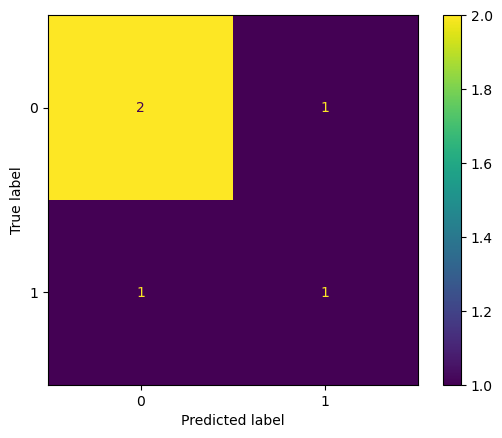

In [20]:
confusion_matrix = metrics.confusion_matrix(test_y, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()